# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

**You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.**

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [162]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [163]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [164]:
# uncomment the following lines if Google Colab is being used
from google.colab import drive
drive.mount('/content/drive')
loan = pd.read_csv("/content/drive/MyDrive/AIML Course/Machine Learning/Project/Loan_Modelling.csv")   ##  Complete the code to read the data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

* Observations
* Sanity checks

In [165]:
loan.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [166]:
loan.tail(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [167]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [168]:
loan.shape

(5000, 14)

In [169]:
loan.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [170]:
def display_box_and_hist(data, feature, figsize=(7, 7)):
  """
  This function displays a boxplot and a histogram for a given feature.

  Args:
    data: A Pandas dataframe.
    feature: The name of the feature to analyze.
    figsize: A tuple specifying the figure size.
  """

  plt.figure(figsize=figsize)

  # Create a boxplot
  plt.subplot(2, 1, 1)
  data[feature].plot.box(vert=False, showmeans=True)

  # Create a histogram
  plt.subplot(2, 1, 2)
  data[feature].hist(bins=10, edgecolor='black')

  # Add title and labels
  plt.suptitle(f'{feature}: Boxplot and Histogram')
  plt.tight_layout()
  plt.show()

In [171]:
def display_count_and_bar(data, feature, figsize=(7, 7)):
  """
  This function displays a count plot and a bar plot for a given feature.

  Args:
    data: A Pandas dataframe.
    feature: The name of the feature to analyze.
    figsize: A tuple specifying the figure size.
  """

  plt.figure(figsize=figsize)

  # Create a count plot
  plt.subplot(1, 2, 1)
  sns.countplot(x=feature, data=data)
  plt.title(f'{feature}: Count Plot')

  # Add labels
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.tight_layout()
  plt.show()

In [172]:
def display_stacked_bar(data, feature1, feature2, figsize=(7, 7)):
  """
  This function displays a stacked bar plot for a given pair of features.

  Args:
    data: A Pandas dataframe.
    feature1: The name of the first feature.
    feature2: The name of the second feature.
    figsize: A tuple specifying the figure size.
  """

  plt.figure(figsize=figsize)

  # Create a stacked bar plot
  data.groupby(feature1)[feature2].value_counts().unstack().plot(kind='bar', stacked=True)

  # Add title and labels
  plt.title(f'{feature1} vs. {feature2}: Stacked Bar Plot')
  plt.xlabel(feature1)
  plt.ylabel(feature2)
  plt.show()

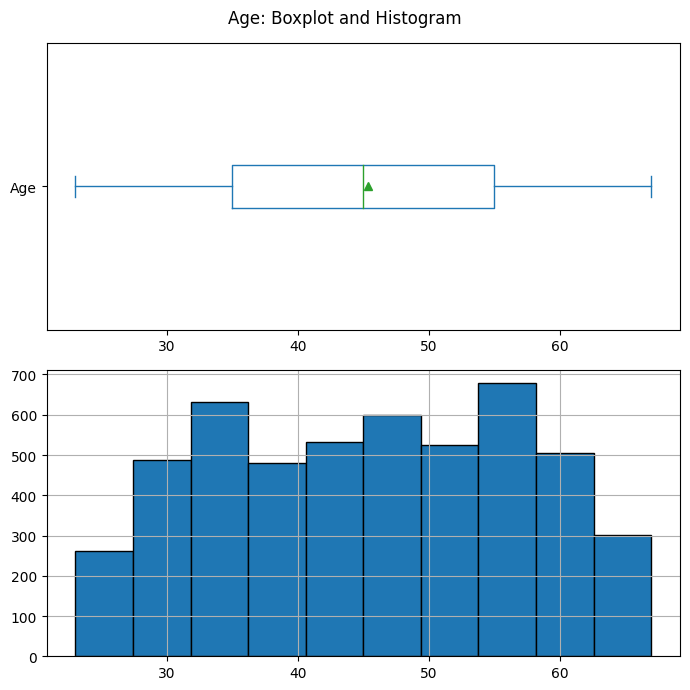

In [173]:
display_box_and_hist(loan, "Age")


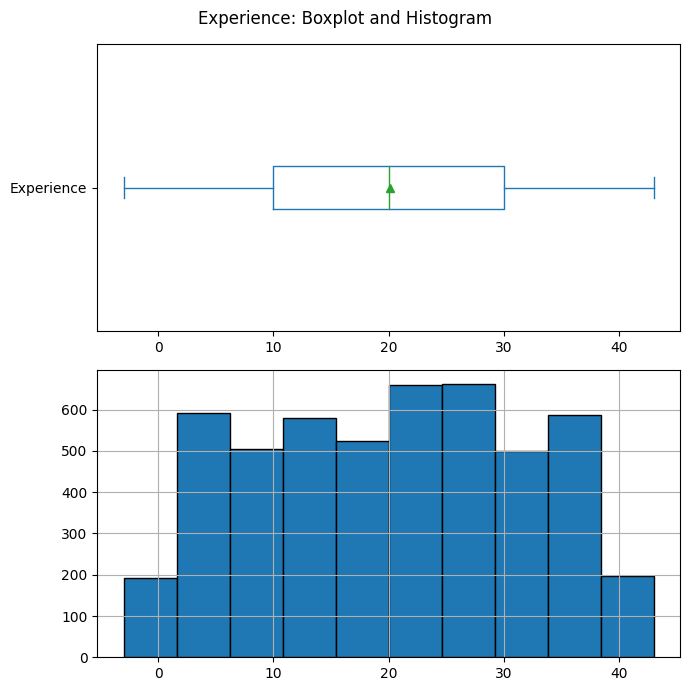

In [174]:
display_box_and_hist(loan, "Experience")

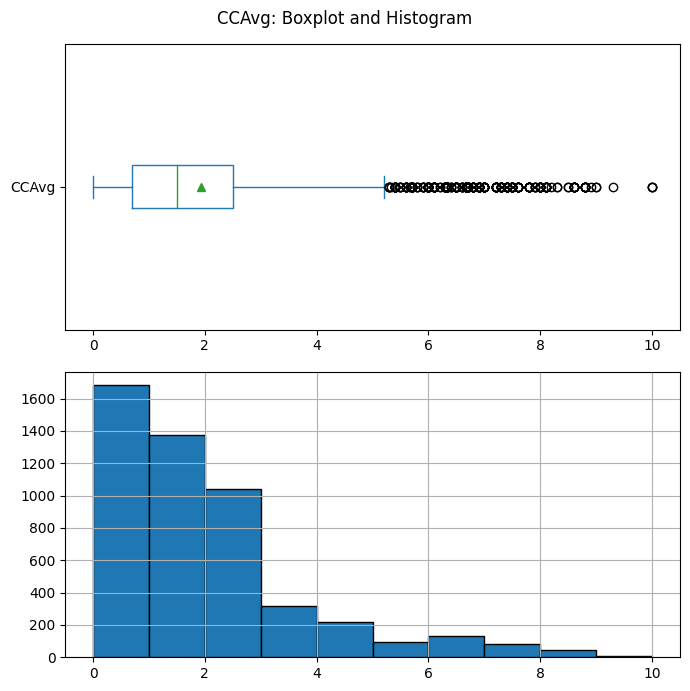

In [175]:
display_box_and_hist(loan, "CCAvg")

CC Avg is right skewed
Max CC Avg is quite higher than Q3.

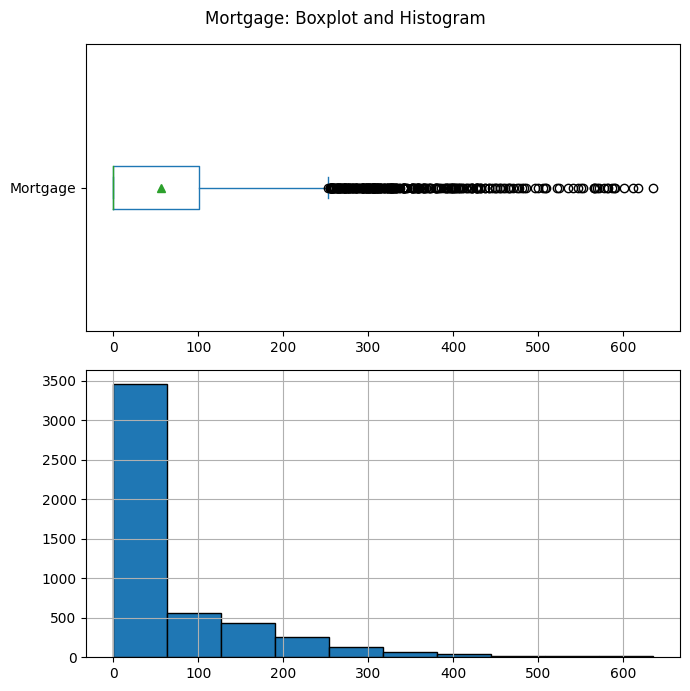

In [176]:
display_box_and_hist(loan, "Mortgage")

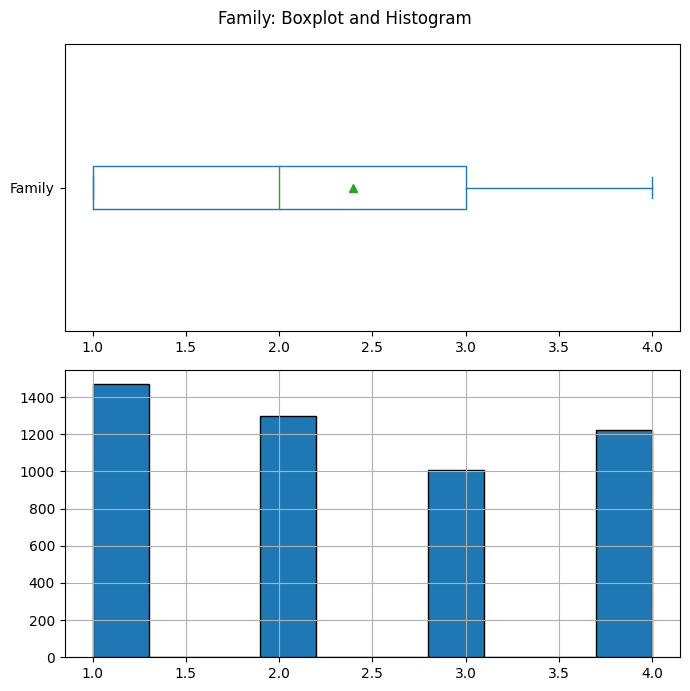

In [177]:
display_box_and_hist(loan, "Family")

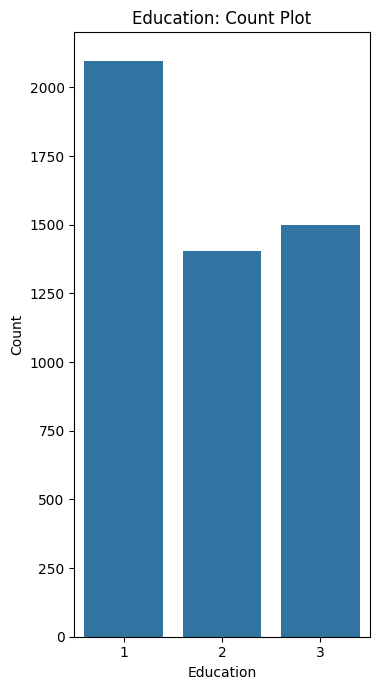

In [178]:
display_count_and_bar(loan, "Education")

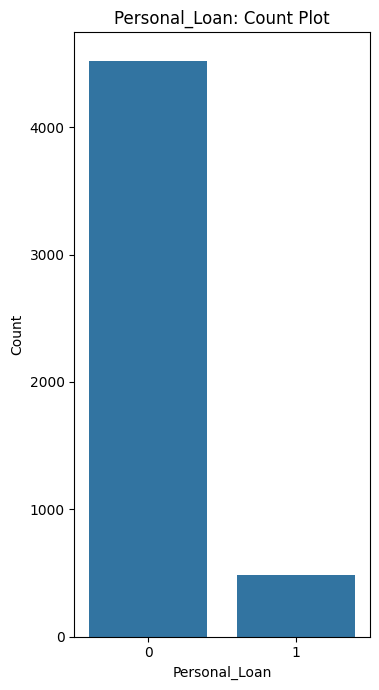

In [179]:
display_count_and_bar(loan, "Personal_Loan")

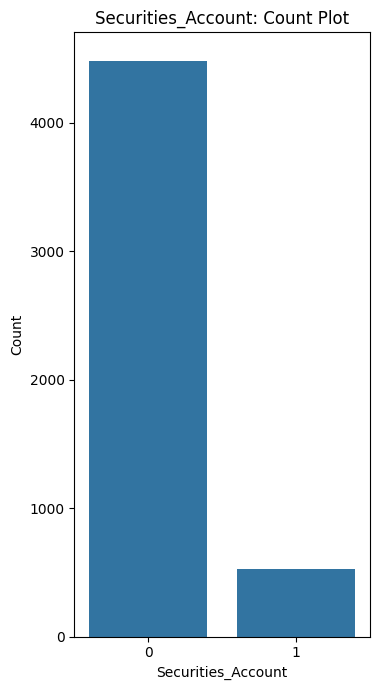

In [180]:
display_count_and_bar(loan, "Securities_Account")

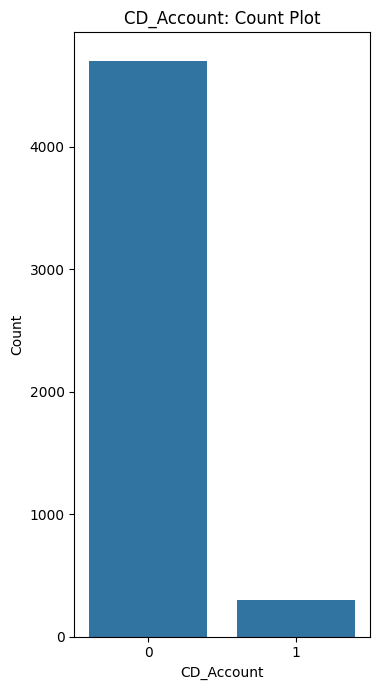

In [181]:
display_count_and_bar(loan, "CD_Account")

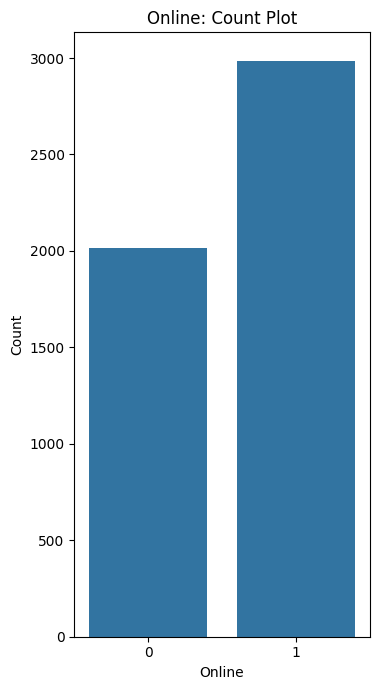

In [182]:
display_count_and_bar(loan, "Online")

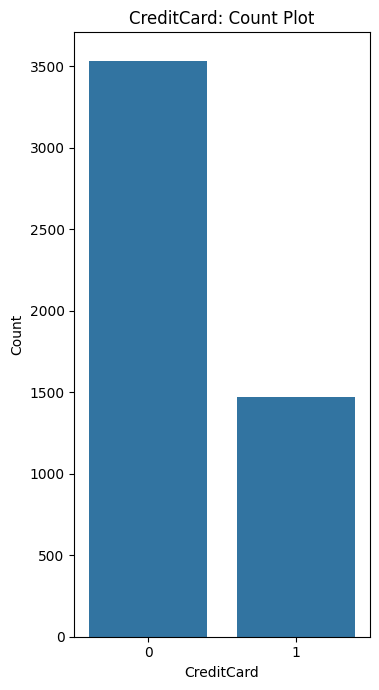

In [183]:
display_count_and_bar(loan, "CreditCard")

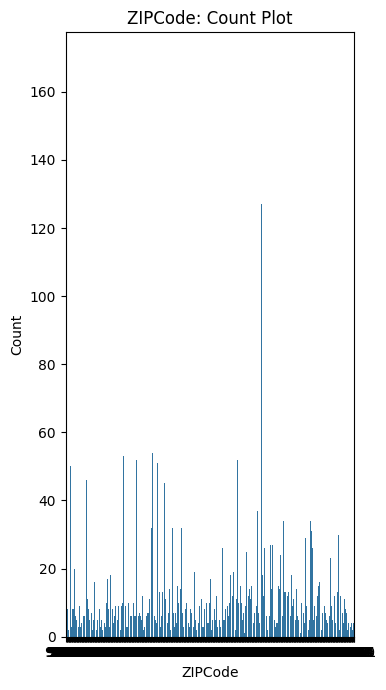

In [184]:
display_count_and_bar(loan, "ZIPCode")

<Figure size 700x700 with 0 Axes>

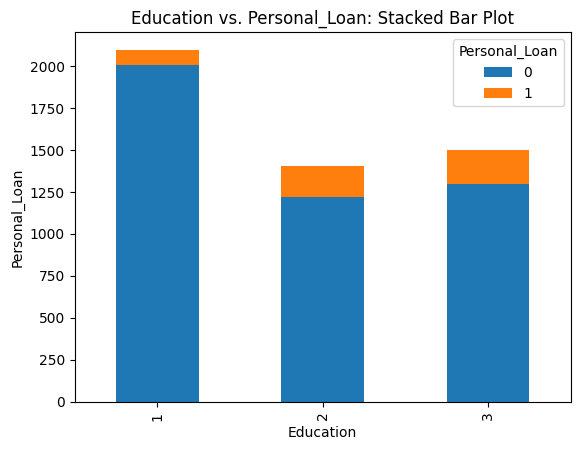

In [185]:
display_stacked_bar(loan, "Education", "Personal_Loan")

<Figure size 700x700 with 0 Axes>

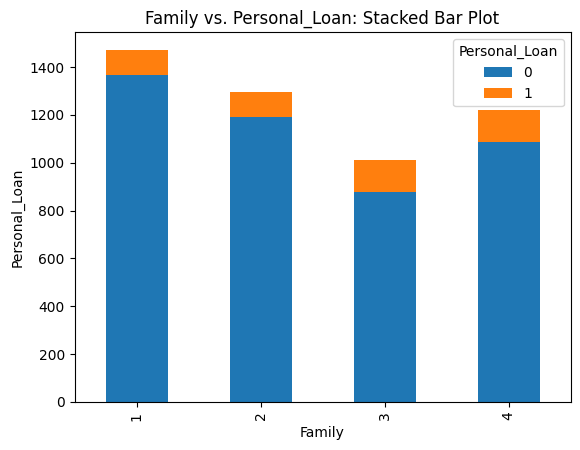

In [186]:
display_stacked_bar(loan, "Family", "Personal_Loan")

<Figure size 700x700 with 0 Axes>

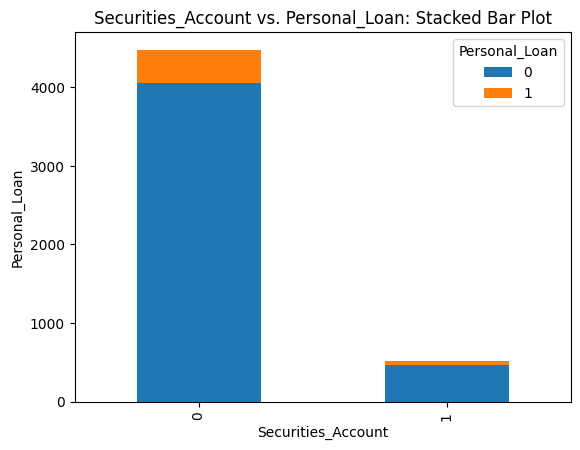

In [187]:
display_stacked_bar(loan, "Securities_Account", "Personal_Loan")

<Figure size 700x700 with 0 Axes>

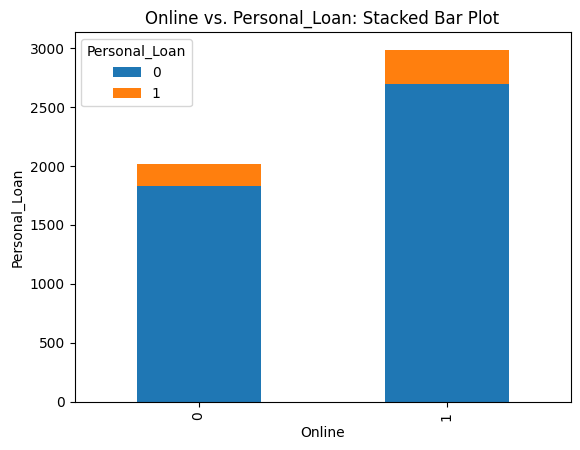

In [188]:
display_stacked_bar(loan, "Online", "Personal_Loan")

<Figure size 700x700 with 0 Axes>

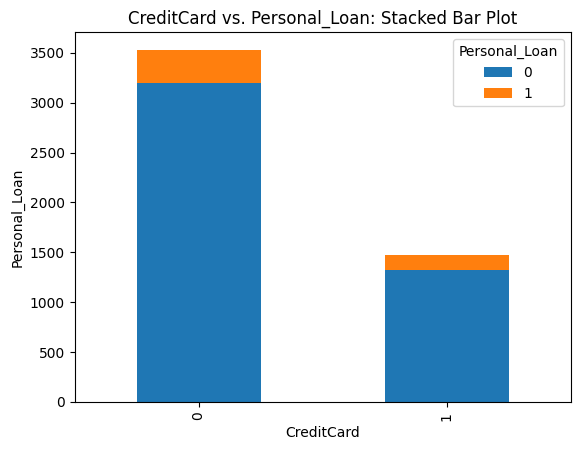

In [189]:
display_stacked_bar(loan, "CreditCard", "Personal_Loan")

<Figure size 700x700 with 0 Axes>

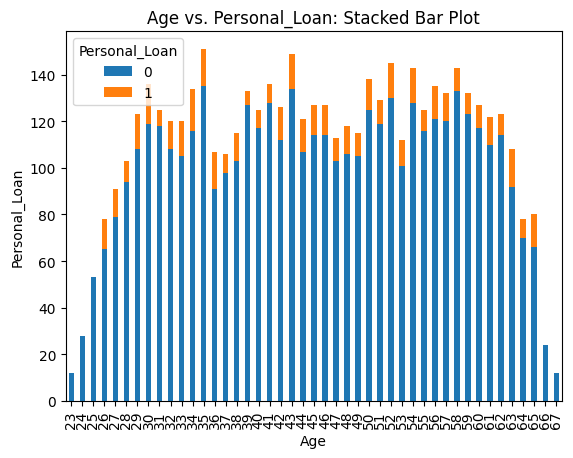

In [190]:
display_stacked_bar(loan, "Age", "Personal_Loan")

<Axes: >

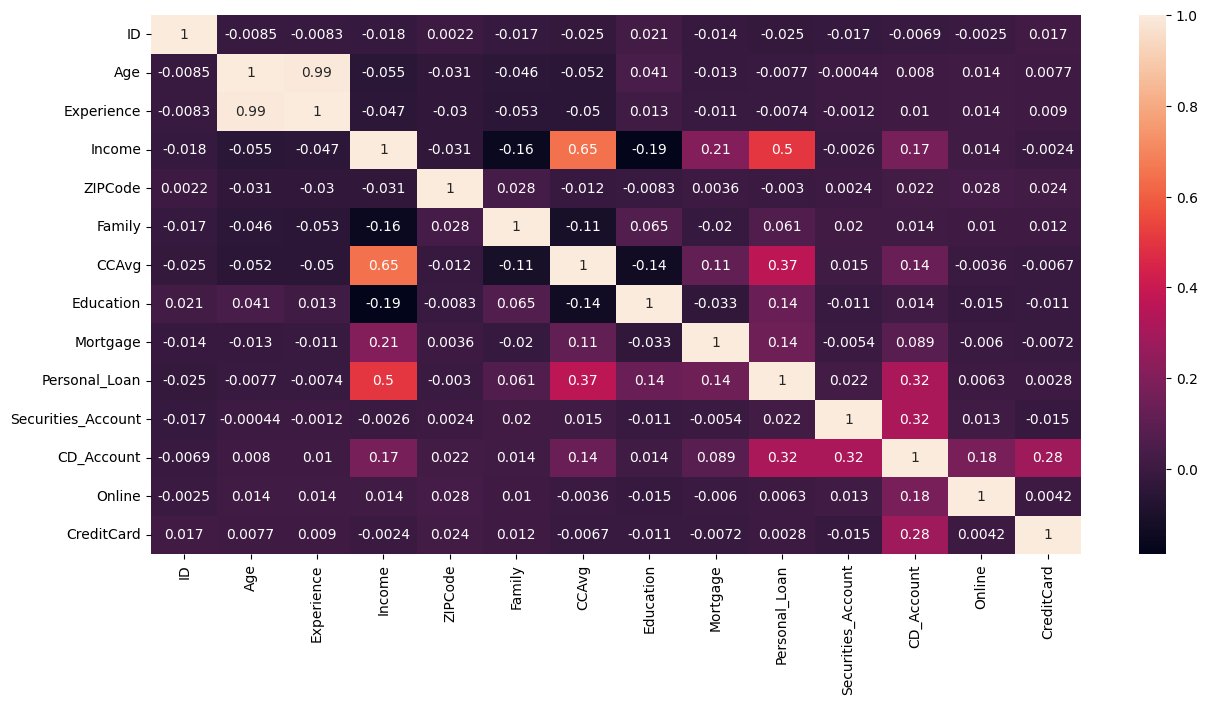

In [191]:
correlation_matrix = loan.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(correlation_matrix, annot=True)

**Observation** - Age & Experience are displaying very high correlation. We can drop one of them.

Observations


**1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?**

Mortage has noticable outliers


**2. How many customers have credit cards?**
3500 Customers have Credit Card

**3. What are the attributes that have a strong correlation with the target attribute (personal loan)?**
Income has the strogest correlatoin with Personal loan. Other positive correlations are Family, CCAve, Education, Mortage, Security Account & CD Account

**4. How does a customer's interest in purchasing a loan vary with their age?**
The acceptance rate appears to be highest for borrowers in the 30-50 year old age group. This is not too clear from the graph that I have chosen.


**5. How does a customer's interest in purchasing a loan vary with their education?**
The stacked bar chart you sent shows that customers with a higher education level are more likely to be interested in purchasing a personal loan.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [192]:
#Check for Missing Values
loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

Observation: No Missing Values detected

In [193]:
#Zip Code Treatment
#Feature Engineering for Zip Code
loan["ZIPCode"] = loan["ZIPCode"].astype(str)
loan["ZIPCode"] = loan["ZIPCode"].str[0:2]
loan["ZIPCode"] = loan["ZIPCode"].astype("category")

**Observation:** Feature Engineering for Zip Code

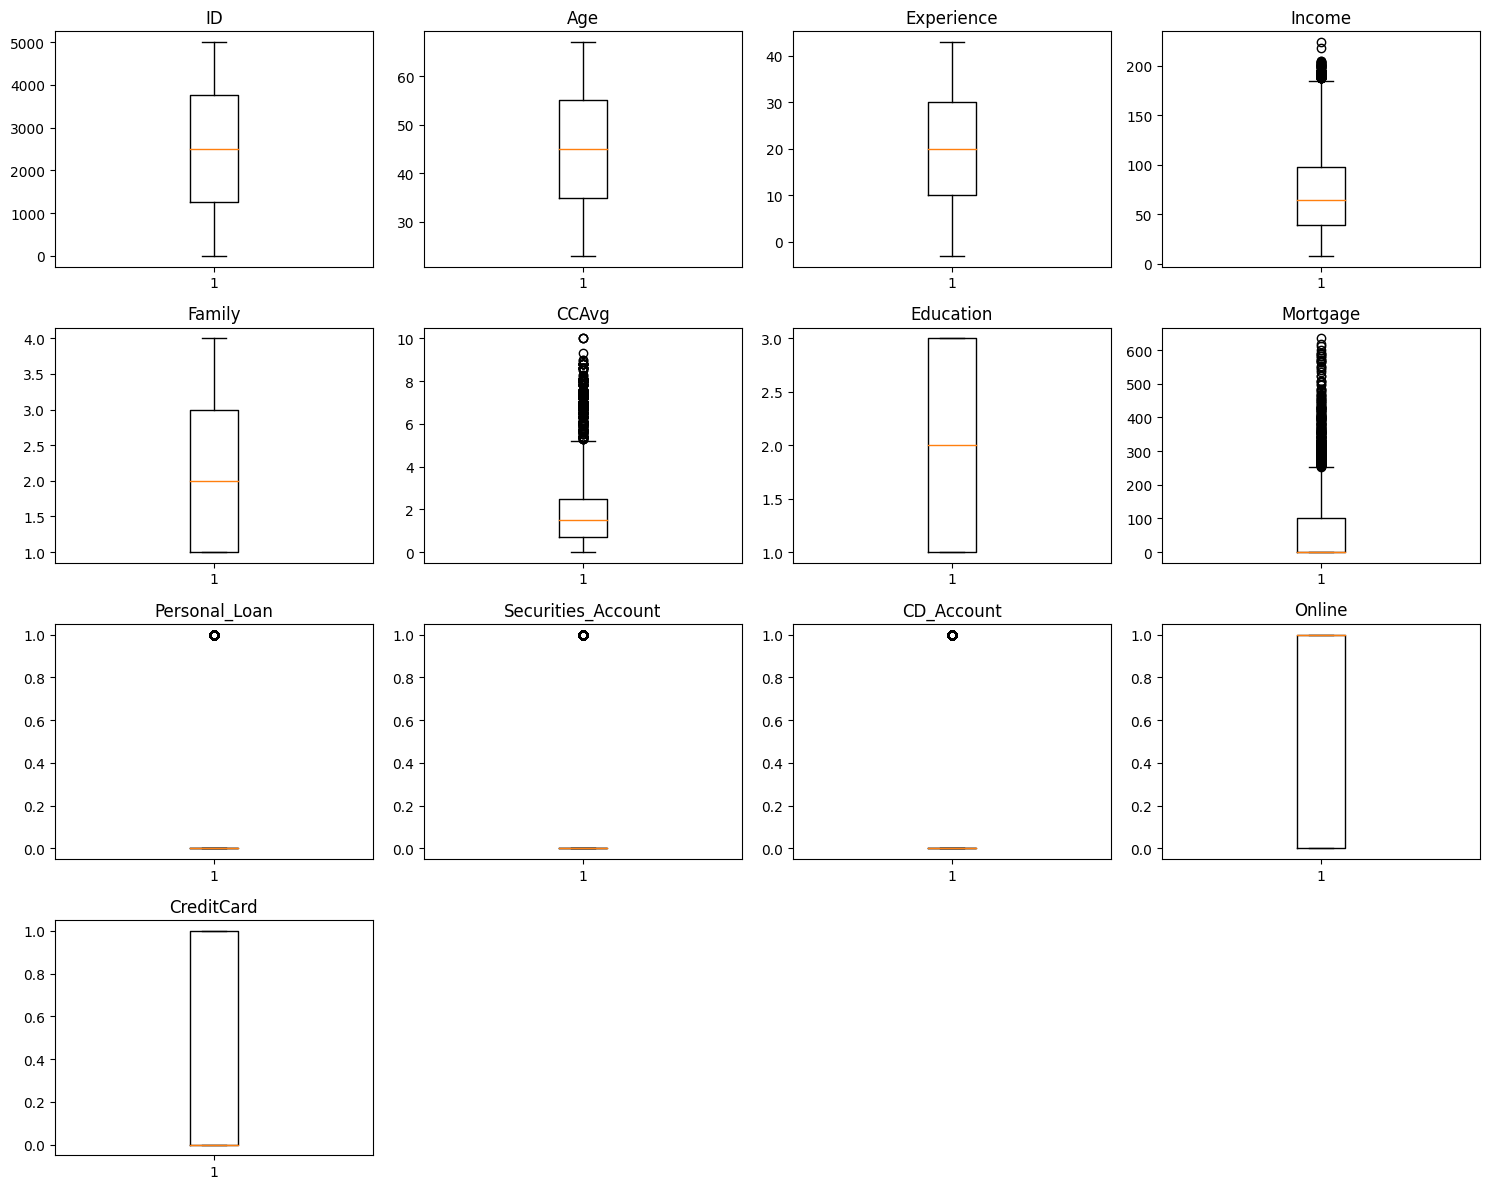

In [194]:
# outlier detection using boxplot
numeric_columns = loan.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(loan[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:** There are outliers for Mortage, & CCAvg

In [195]:
#Observation - ID Column can be dropped
#Mortage has 5.82% outliers, which is not much IMO

**Observation:** No Missing Values detected

In [196]:
#Experience
loan[loan['Experience'] < 0].groupby(by='Age')['Experience'].agg(['count','min','max']).T

Age,23,24,25,26,28,29
count,12,17,18,1,1,3
min,-3,-3,-2,-1,-2,-1
max,-1,-1,-1,-1,-2,-1


In [197]:
#Treating Experience as Absolute. Assuming that they have been entered errornously.
loan.loc[loan['Experience']<0,'Experience']=np.abs(loan['Experience'])

In [198]:
#Preparing for Modelling
# dropping Personal Load & ID & Experience
X = loan.drop(["ID", "Personal_Loan", "Experience"], axis=1)
Y = loan["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

## Model Building

In [199]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [200]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Evaluation Criterion

If a customer does not take the loan but the model predicts that he will take a loan - This is loss in $$

If a customer buys a loan when model predicted it would not - This is loss of business


**Which case is more important?**
The whole purpose of the campaign is to bring in more customers.

2nd case is more important to us. If a potential customer is missed by the sales/marketing team, it will be loss of opportunity. The evaluation criteria should be minimal Loss of Business.

How to reduce this loss i.e need to reduce False Negatives?
Recall should be maximized, the greater the Recall, higher the chances of identifying both the classes correctly.


### Model Building

In [201]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

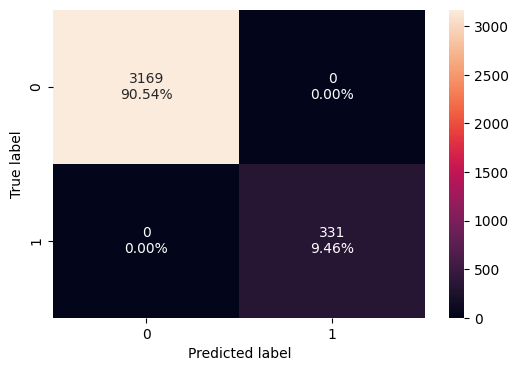

In [202]:
confusion_matrix_sklearn(model0, X_train, y_train)

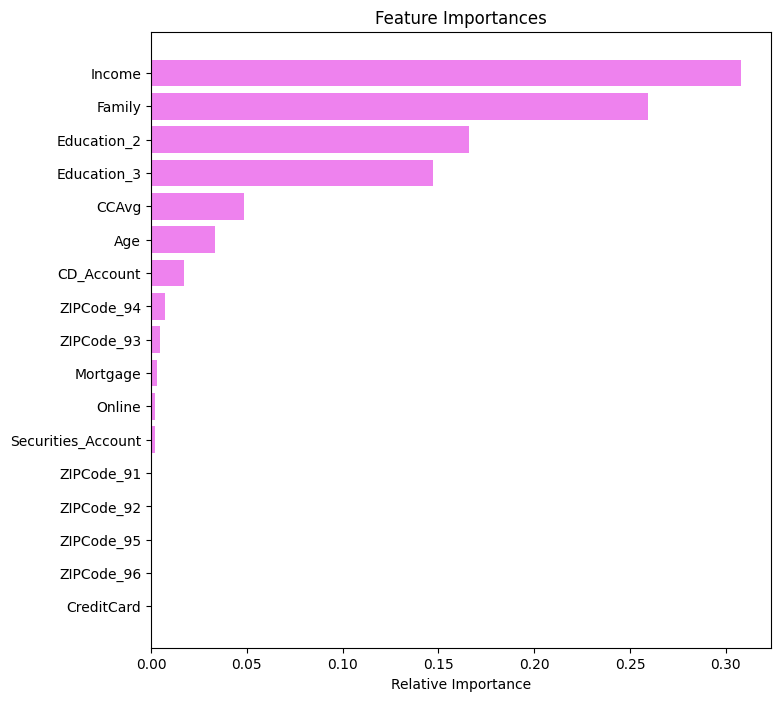

In [203]:
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Model Performance Improvement

In [204]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [205]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


In [206]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


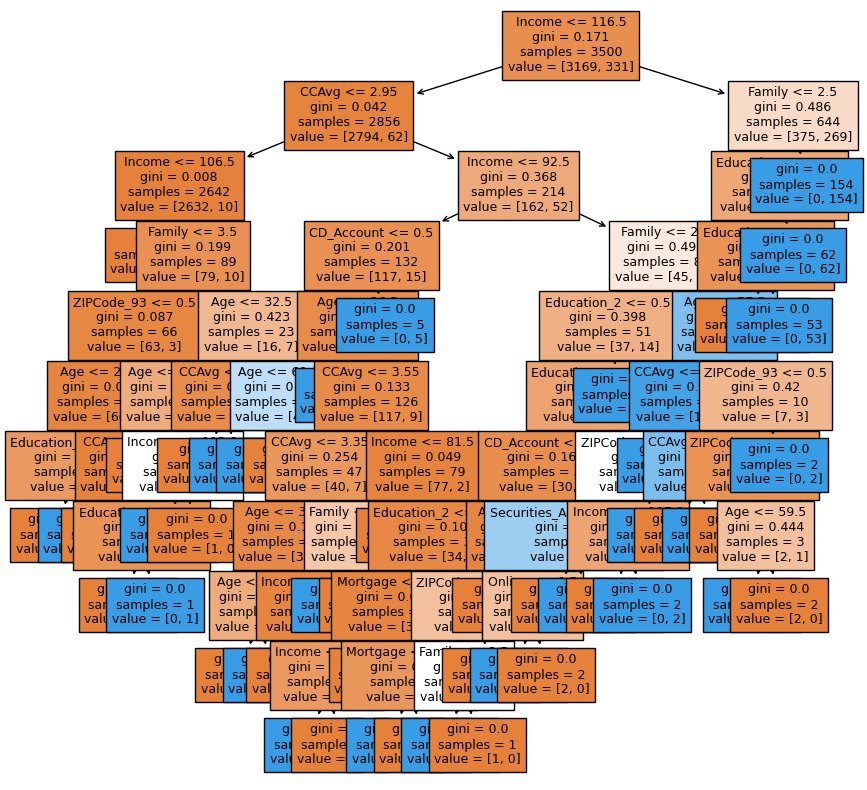

In [207]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    model0,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [208]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

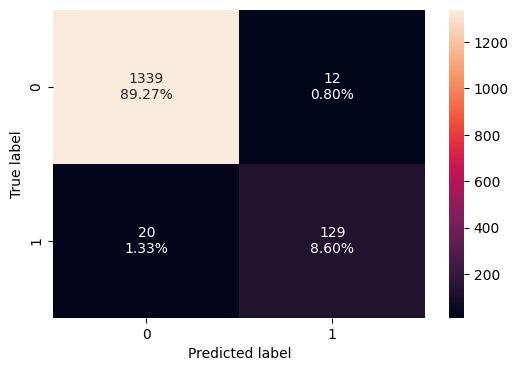

In [209]:
confusion_matrix_sklearn(model, X_test, y_test)

In [210]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [211]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test


,Accuracy,Recall,Precision,F1
0,0.978667,0.865772,0.914894,0.889655


In [212]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


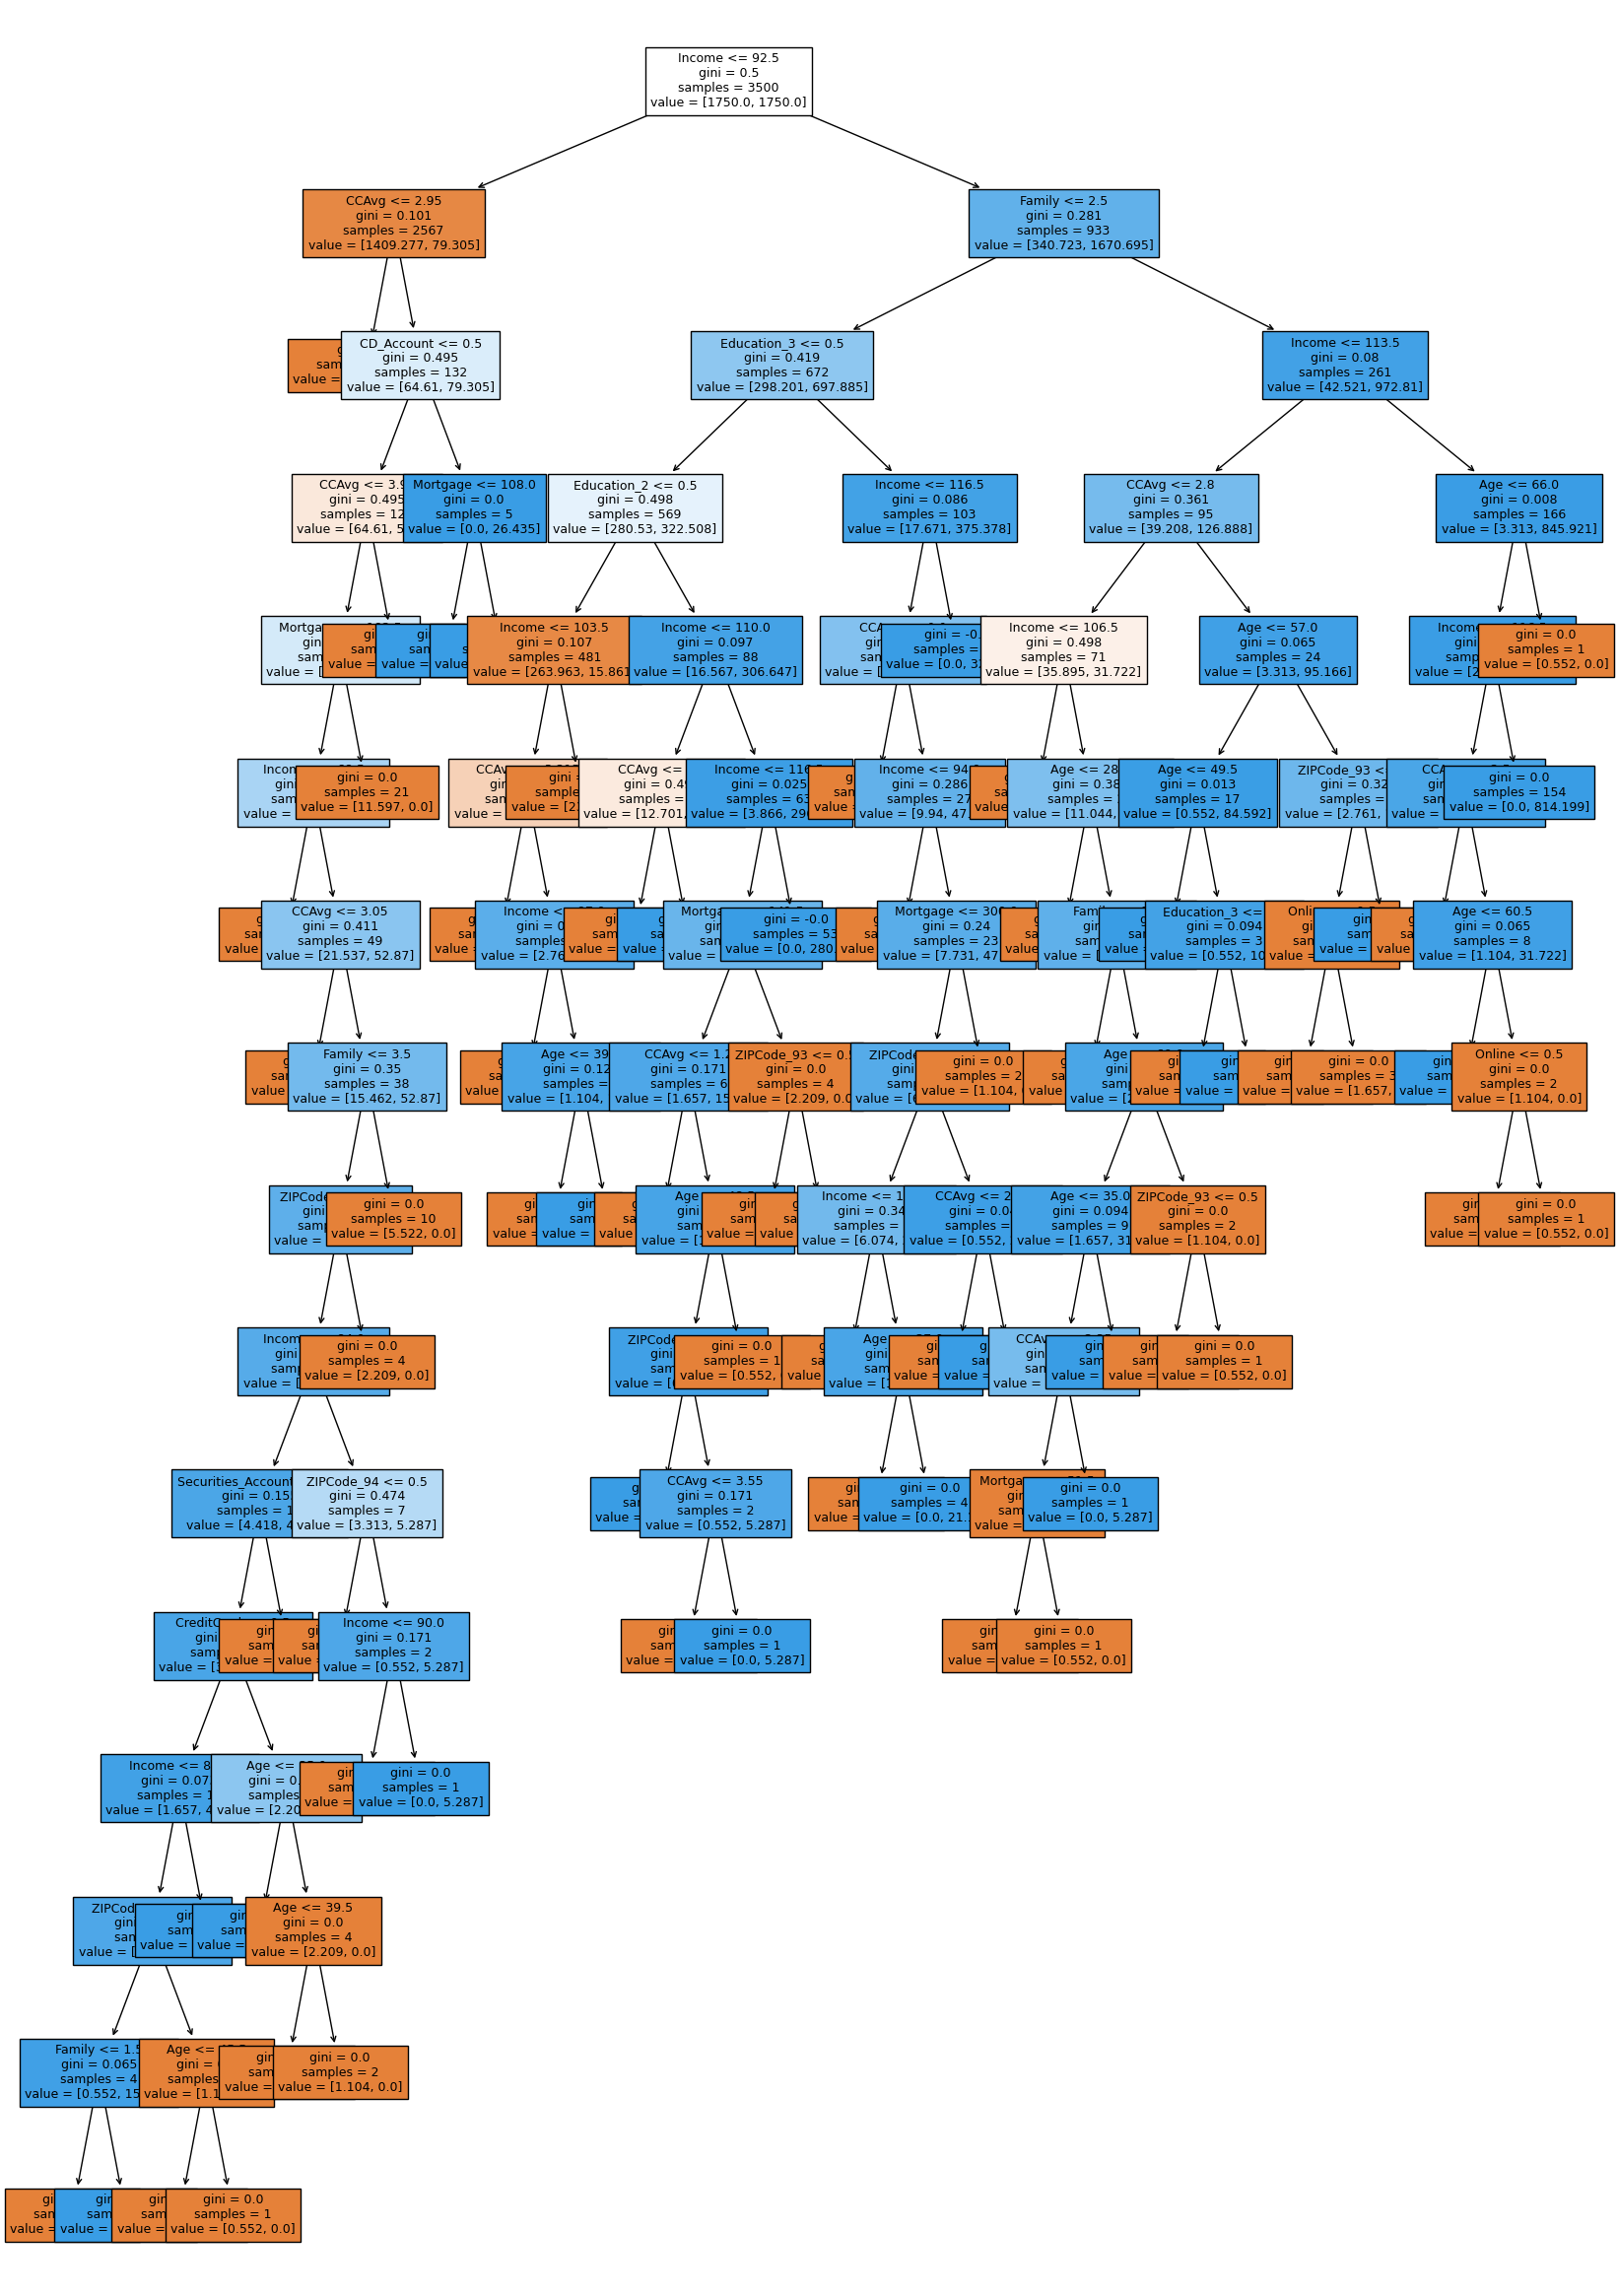

In [213]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [214]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
   "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=3,
                       random_state=1)

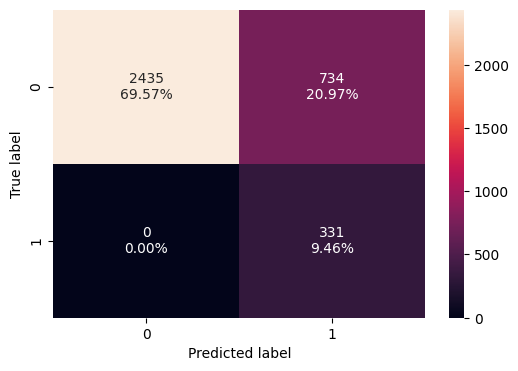

In [215]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [216]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


In [217]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


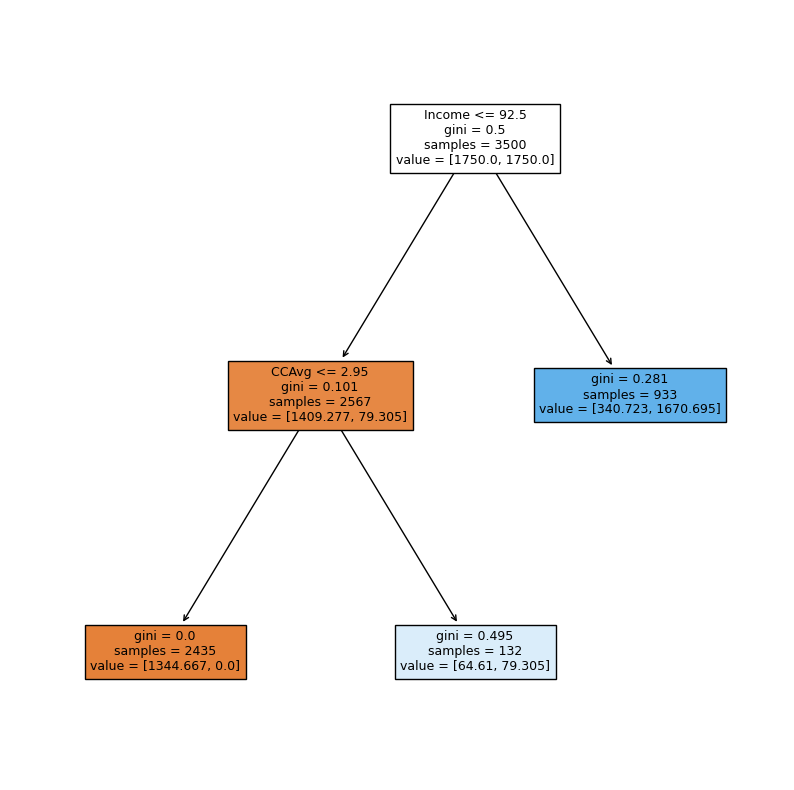

In [218]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [219]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [220]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000214,0.001542
3,0.000242,0.002750
4,0.000250,0.003250
5,0.000268,0.004324
6,0.000272,0.004868
7,0.000276,0.005420
8,0.000381,0.005801
9,0.000527,0.006329


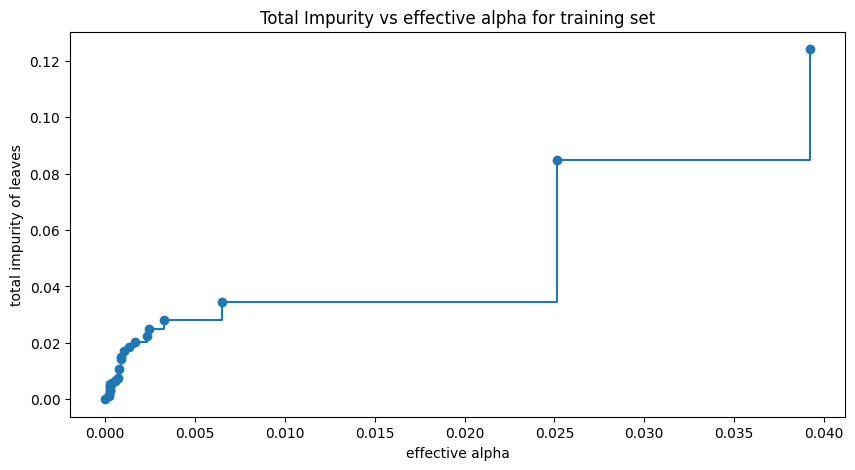

In [221]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [222]:
clfs = []
for ccp_alpha in ccp_alphas:
    cost_pruning_model = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    cost_pruning_model.fit(X_train,y_train)     ## Complete the code to fit decision tree on training data
    clfs.append(cost_pruning_model)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


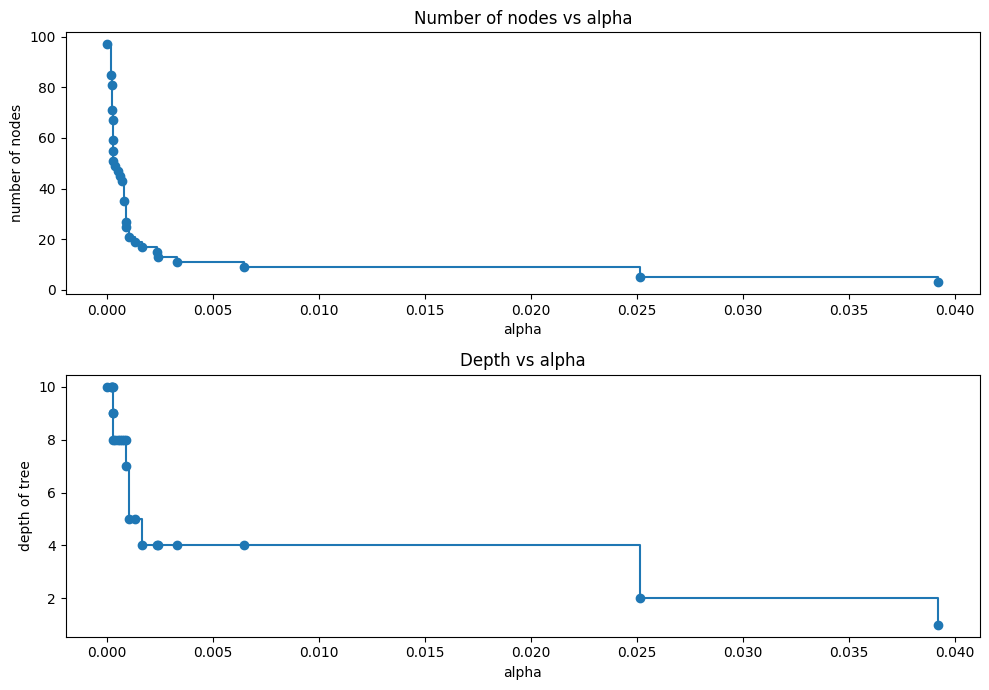

In [223]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [224]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

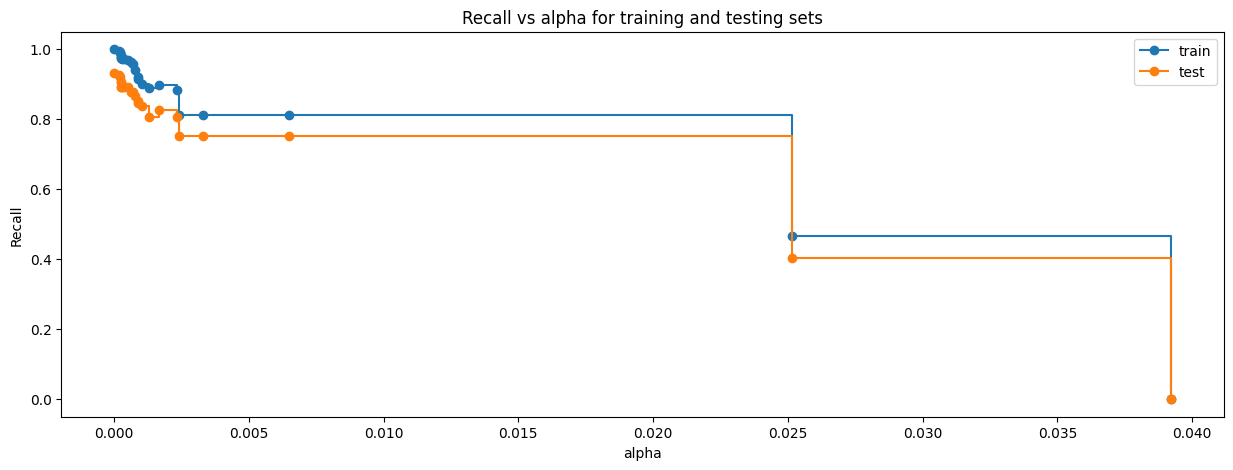

In [225]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [226]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


In [227]:
postpruning_model = DecisionTreeClassifier(
    ccp_alpha=0.04708834100596766, class_weight={0: 0.15, 1: 0.85}, random_state=1         ## Complete the code by adding the correct ccp_alpha value
)
postpruning_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.04708834100596766,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

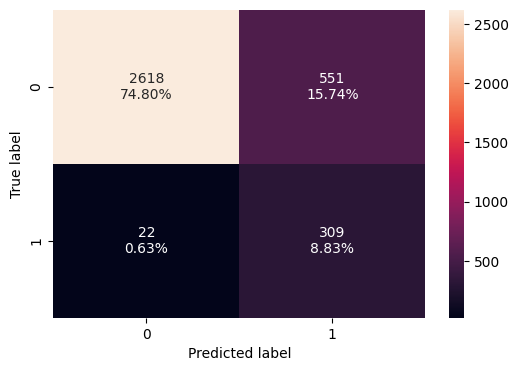

In [228]:
confusion_matrix_sklearn(postpruning_model,X_train,y_train) ## Complete the code to create confusion matrix for train data

In [229]:
decision_tree_tune_post_train = model_performance_classification_sklearn(postpruning_model,X_train,y_train) ## Complete the code to check performance on train data
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.836286,0.933535,0.359302,0.518892


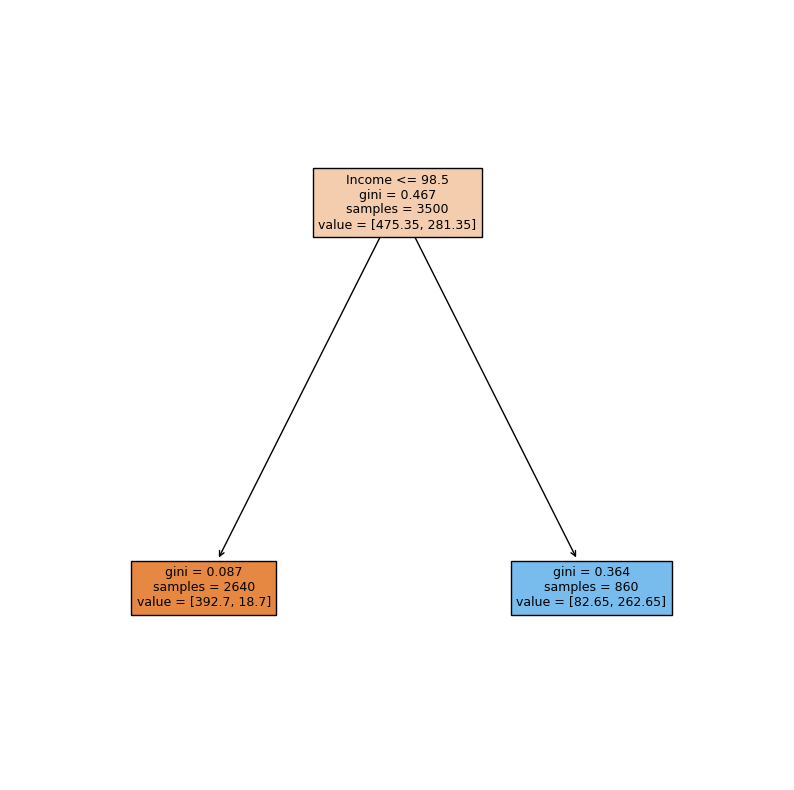

In [230]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    postpruning_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [231]:
# Text report showing the rules of a decision tree -

print(tree.export_text(postpruning_model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- weights: [392.70, 18.70] class: 0
|--- Income >  98.50
|   |--- weights: [82.65, 262.65] class: 1



In [232]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        postpruning_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                    Imp
Income              1.0
Age                 0.0
ZIPCode_91          0.0
Education_2         0.0
ZIPCode_96          0.0
ZIPCode_95          0.0
ZIPCode_94          0.0
ZIPCode_93          0.0
ZIPCode_92          0.0
CreditCard          0.0
Online              0.0
CD_Account          0.0
Securities_Account  0.0
Mortgage            0.0
CCAvg               0.0
Family              0.0
Education_3         0.0


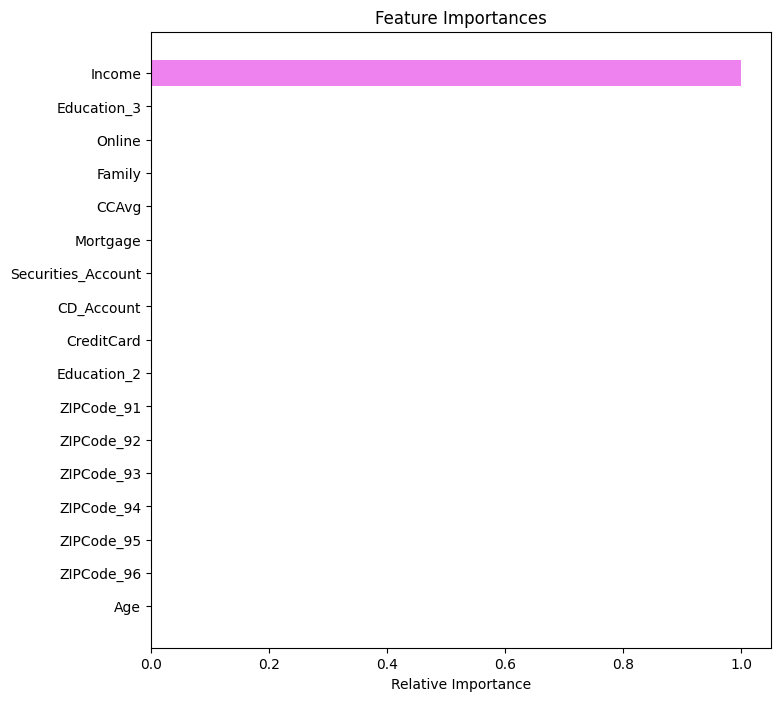

In [233]:
importances = postpruning_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

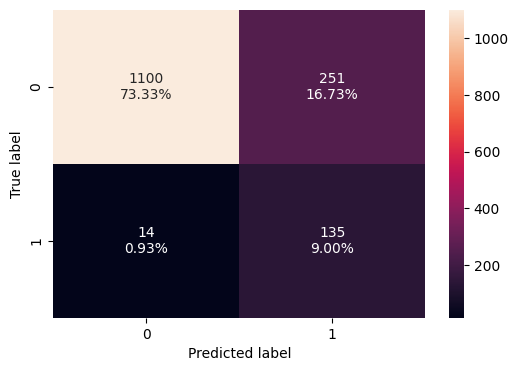

In [234]:
confusion_matrix_sklearn(postpruning_model,X_test, y_test)  # Complete the code to get the confusion matrix on test data

In [235]:
decision_tree_tune_post_test = model_performance_classification_sklearn(postpruning_model,X_test, y_test) ## Complete the code to get the model performance on test data
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.823333,0.90604,0.349741,0.504673


## Model Comparison and Final Model Selection

In [236]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_tune_post_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Pre-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Pre-Pruning)
Accuracy,1.0,1.0,0.790286,0.836286
Recall,1.0,1.0,1.000000,0.933535
Precision,1.0,1.0,0.310798,0.359302
F1,1.0,1.0,0.474212,0.518892


In [237]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_tune_post_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986000,0.978667,0.779333,0.823333
Recall,0.932886,0.865772,1.000000,0.906040
Precision,0.926667,0.914894,0.310417,0.349741
F1,0.929766,0.889655,0.473768,0.504673


Based on the above comparision I am going to selected decision tree with pre-pruning since it has the higest recall.

Decision Tree with pre-pruning appears to be best suited for our prediction.

Please note I have not done the computation for post-pruning. Given this pre-prunning appears to be the best.

## Actionable Insights and Business Recommendations


The best performing model was derived from the Decision Tree Modelling default with Recall of 93.2886

The  evidence show the Features that most affects the client decision to accept a personal loan are listed below

1. Income - Income increases, customer takes more loan
2. Family - Family size grows, customer take more loan
3. Education 2 - Customers with education level 2 has more chances of taking loan
4. Education 3 - Customers with education level 3 has more chances of taking loan
5. CCAvg - When montly spending increases, there is more chance of taking loan

**What recommedations would you suggest to the bank?**

It is recommended to study the customers profiles based on the above conditions and then run Personal loan campaign.

___